###1.Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [5]:
data, target, coef = datasets.make_regression(n_samples = 1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)


In [6]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]
display(means, stds)

array([-0.0790127 ,  0.02045785])

array([0.98563537, 0.99101454])

###Градиентный спуск

In [4]:
w = np.zeros(2)
eta, tol, min_err  = 0.07, 1e-8, float('inf')
num_iter = 1
err_list_1 = []

while True: 
  target_pred = np.dot(data, w)
  err = np.mean((target - target_pred)**2)
  err_list_1.append(err)
  if abs(min_err - err) > tol:
      min_err = err
  else:
      print(f'Iteration #{num_iter}: W_new = {w}, MSE = {round(err,2)}')
      break
  w -= 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
  if num_iter % 10 == 0:
        eta /= 1.05
  num_iter += 1 


Iteration #114: W_new = [61.43591045 67.66528134], MSE = 38.57


###Стохастический градиентный спуск

In [7]:
def mserror(X, w, y):
    y_pred = X.dot(w)
    return sum((y - y_pred)**2) / len(y)

In [8]:
from numpy.random.mtrand import randint
w = np.zeros(2)
eta, tol, min_err  = 0.07, 1e-8, float('inf')
num_iter = 1
w_list = [w.copy()]
err_list_2 = []

while True:
  train_ind = np.random.randint(data.shape[0]) 
  w_new = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
  err = mserror(data, w_new, target)
  w_dist = np.linalg.norm(w_new - w, ord = 2)
  w_list.append(w_new.copy())
  err_list_2.append(err)
  if w_dist > tol:
      min_err = err
  else:
      print(f'Iteration #{num_iter}: W_new = {w_new}, MSE = {err}')
      break
  num_iter += 1
  w = w_new
w_list = np.array(w_list)  

Iteration #39903: W_new = [61.12055935 67.34930967], MSE = 38.76292445577321


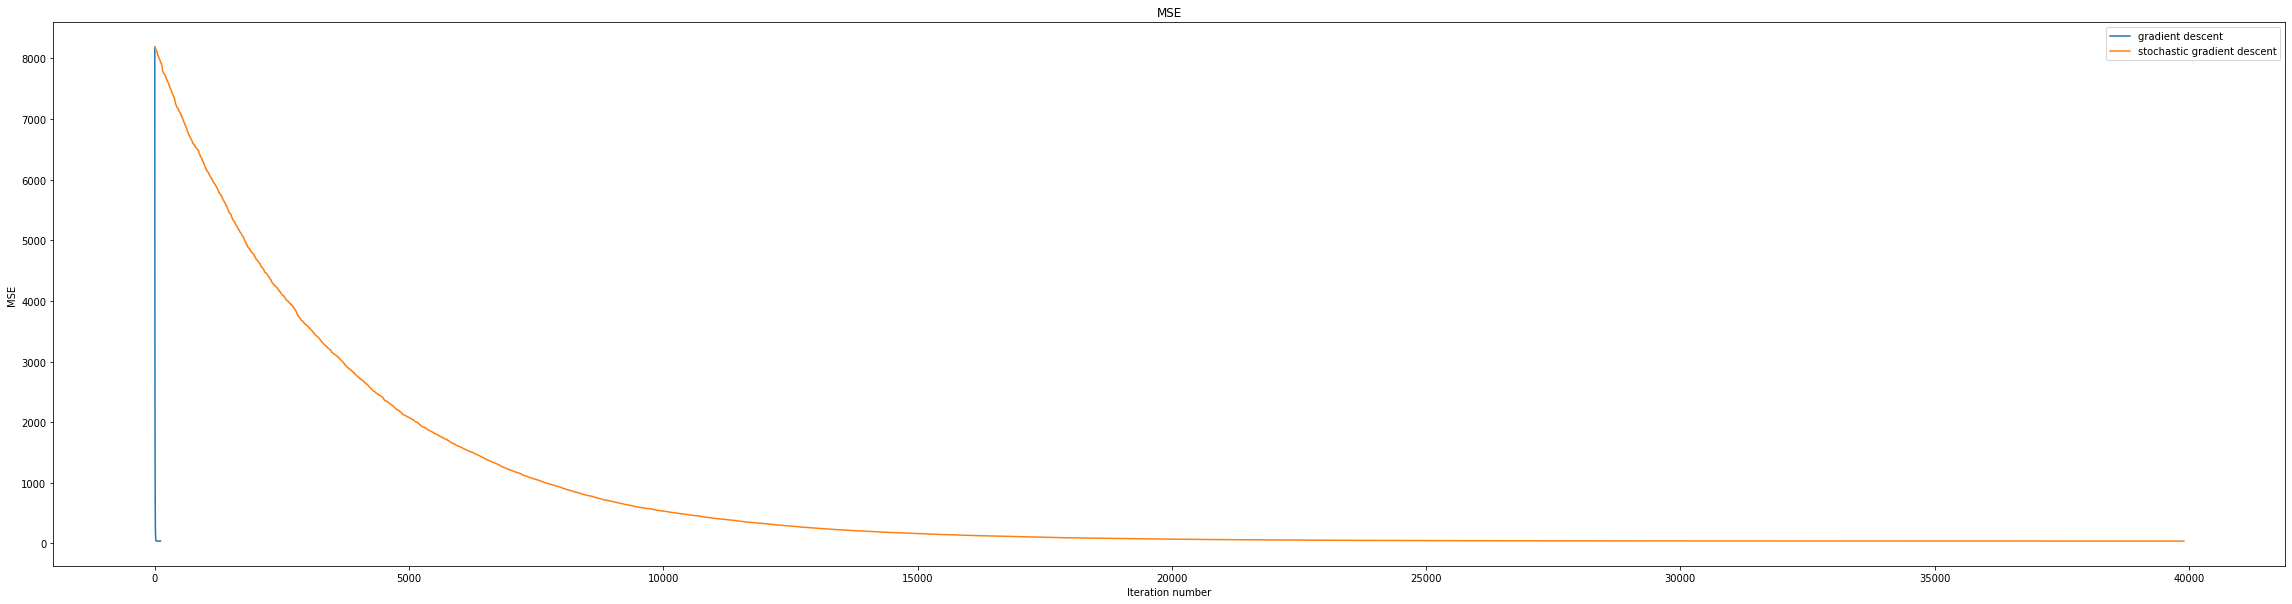

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(40)

ax.plot(range(len(err_list_1)), err_list_1, label = 'gradient descent')
ax.plot(range(len(err_list_2)), err_list_2, label = 'stochastic gradient descent')
ax.legend()
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

###Вывод: скорость сходимости у градиентного спуска значительно превосходит скорость сходимости у стохастического градиентного спуска